
# Module 1: Introduction to Machine Learning

**Learning Objectives**
- Define machine learning and explain its significance.
- Differentiate between rule-based systems and machine learning.
- Understand the basic idea of supervised and unsupervised learning with examples.
- Recognize the role of Python libraries such as pandas, scikit-learn, and NumPy in ML workflows.



## What is Machine Learning?

Machine Learning (ML) is a field of Artificial Intelligence (AI) where systems **learn patterns from data** 
and improve their performance without being explicitly programmed with fixed rules.

Formally, we can think of a model as a function:

$$ \hat{y} = f_{\theta}(x) $$

Where:
- $x$ is the **input data** (features).
- $\hat{y}$ is the **predicted output** (label).
- $f_{\theta}$ is the **model** with parameters $\theta$ (these parameters are learned from data).

Unlike traditional programming (where rules are hard-coded), ML allows the system to **adapt** 
and **improve** automatically as it sees more data.



## Rule-Based Systems vs Machine Learning

**Rule-Based System (RBS):**
- The developer writes a set of **if-then rules** to make decisions.
- Example: *If attendance < 75% then "Fail", else "Pass".*
- Works well for simple and static situations.

**Machine Learning:**
- Learns patterns from data automatically.
- Adapts as new data arrives.
- Example: Uses past student data (hours studied, attendance) to **predict probability of passing**.

**Key Difference:** RBS uses explicit logic programmed by humans. ML *learns rules from data*.



## Supervised Learning Example

In supervised learning, we have data with both **inputs** and **outputs** (labels). 
The goal is to learn a function that maps inputs to outputs.

Example: Predict whether a student will pass (output) based on hours studied and attendance (inputs).





In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a dataset with 30 students: hours studied, attendance %, and whether student passed (1) or failed (0)
data = {
    'hours_studied': [2, 4, 6, 1, 7, 5, 8, 3, 9, 2, 6, 4, 10, 1, 5, 7, 3, 8, 6, 2, 9, 4, 7, 5, 1, 6, 8, 3, 10, 4],
    'attendance': [60, 80, 85, 50, 90, 75, 95, 65, 92, 55, 88, 70, 96, 45, 78, 89, 62, 93, 84, 58, 91, 72, 87, 76, 48, 82, 94, 67, 98, 74],
    'passed': [0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
}

df = pd.DataFrame(data)
df

,hours_studied,attendance,passed
0,2,60,0
1,4,80,1
2,6,85,1
3,1,50,0
4,7,90,1
5,5,75,1
6,8,95,1
7,3,65,0
8,9,92,1
9,2,55,0



## Mathematical Foundation of Logistic Regression

### The Logistic Function

Logistic regression uses the **sigmoid function** to map any real number to a probability between 0 and 1:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Where $z$ is the **linear combination** of our features:

$$ z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$

For our student example with 2 features:
$$ z = \theta_0 + \theta_1 \cdot \text{hours\_studied} + \theta_2 \cdot \text{attendance} $$

### Complete Logistic Regression Model

The probability that a student passes is:

$$ P(\text{pass} = 1 | x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2)}} $$

**Decision Rule:**
- If $P(\text{pass} = 1 | x) \geq 0.5$ → Predict "Pass" (1)
- If $P(\text{pass} = 1 | x) < 0.5$ → Predict "Fail" (0)

### Why Use the Sigmoid Function?

1. **Output Range:** Always between 0 and 1 (perfect for probabilities)
2. **S-shaped Curve:** Smooth transition from 0 to 1
3. **Interpretable:** Clear decision boundary at 0.5


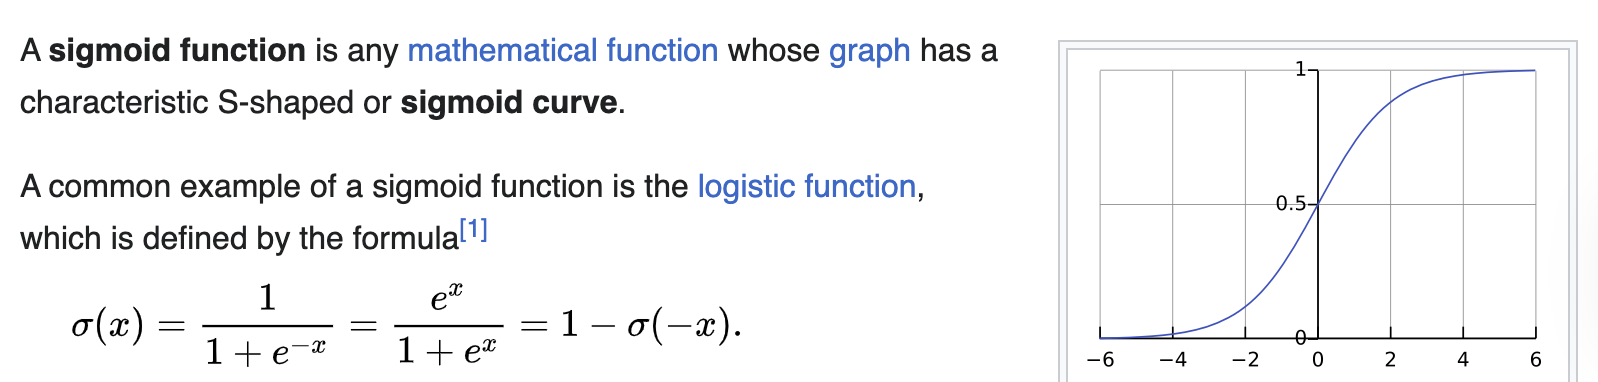

In [25]:
# Features (inputs) and target (output)
X = df[['hours_studied', 'attendance']]
y = df['passed']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the split information using formatted output
print("Dataset Split Information:")
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

# Display training data in Data Wrangler friendly format
print("\nTraining Data (Features and Labels):")
X_train_display = X_train.copy()
X_train_display['passed'] = y_train
X_train_display

# Display test data in Data Wrangler friendly format  
print("\nTest Data (Features and Labels):")
X_test_display = X_test.copy()
X_test_display['passed'] = y_test
X_test_display

Dataset Split Information:
Total samples: 30
Training samples: 22 (73.3%)
Test samples: 8 (26.7%)

Training Data (Features and Labels):

Test Data (Features and Labels):


,hours_studied,attendance,passed
27,3,67,0
15,7,89,1
23,5,76,1
17,8,93,1
8,9,92,1
9,2,55,0
28,10,98,1
24,1,48,0


## Model Training and Evaluation

Now we'll train our logistic regression model on the training data and evaluate its performance using two key metrics:

### Key Evaluation Metrics

**1. Accuracy:** The percentage of correct predictions out of all predictions made.
- Formula: `Accuracy = (Correct Predictions) / (Total Predictions)`
- Range: 0 to 1 (or 0% to 100%)
- Higher values indicate better performance

**2. Confusion Matrix:** A table showing correct vs incorrect predictions for each class.
- Shows true positives, true negatives, false positives, and false negatives
- Helps identify which classes the model struggles with
- Format for binary classification:
  ```
  Predicted:    0    1
  Actual: 0   [TN] [FP]
  Actual: 1   [FN] [TP]
  ```
  Where: TN=True Negative, FP=False Positive, FN=False Negative, TP=True Positive

In [28]:
# Initialize and train logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Performance:")
print("=" * 40)
print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"This means the model correctly predicted {accuracy*100:.1f}% of student outcomes")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("\nConfusion Matrix:")
print("=" * 25)
print("Predicted:    Fail  Pass")
print(f"Actual: Fail   {cm[0,0]:2d}    {cm[0,1]:2d}")
print(f"Actual: Pass   {cm[1,0]:2d}    {cm[1,1]:2d}")

# Show actual vs predicted for each test sample
print("\nDetailed Test Results:")
print("=" * 35)
test_results = X_test.copy()
test_results['Actual'] = y_test.values
test_results['Predicted'] = y_pred
test_results['Correct'] = (y_test.values == y_pred)
print(test_results)

Model Performance:
Accuracy: 1.000 (100.0%)
This means the model correctly predicted 100.0% of student outcomes

Confusion Matrix:
Predicted:    Fail  Pass
Actual: Fail    3     0
Actual: Pass    0     5

Detailed Test Results:
    hours_studied  attendance  Actual  Predicted  Correct
27              3          67       0          0     True
15              7          89       1          1     True
23              5          76       1          1     True
17              8          93       1          1     True
8               9          92       1          1     True
9               2          55       0          0     True
28             10          98       1          1     True
24              1          48       0          0     True


In [29]:
# --- Predict pass/fail for 3 new students using the trained model ---

# Create a new dataset for 3 students
new_students = pd.DataFrame({
    'hours_studied': [3, 7, 1],      # Example values, change as needed
    'attendance': [65, 90, 55]
})

# Use the trained model to predict
predictions = model.predict(new_students)
probabilities = model.predict_proba(new_students)[:, 1]  # Probability of passing

# Display results
new_students['Predicted_Pass'] = predictions
new_students['Probability_Pass'] = probabilities

print("Predictions for New Students:")
print(new_students)

Predictions for New Students:
   hours_studied  attendance  Predicted_Pass  Probability_Pass
0              3          65               0          0.499785
1              7          90               1          0.991856
2              1          55               0          0.070601


## Unsupervised Learning Example

In unsupervised learning, we only have **inputs** and no labeled outputs. 
The model tries to find **patterns or clusters** in the data without being told what to look for.

**Key Characteristics:**
- No target variable (y) to predict
- Algorithm discovers hidden patterns in data
- Common tasks: clustering, dimensionality reduction, anomaly detection

**Example:** Grouping students by cost-of-living factors to identify spending patterns.

### K-Means Clustering Algorithm
K-Means is a popular clustering algorithm that:
- Groups data into k clusters
- Minimizes distance between data points and cluster centers
- Iteratively improves cluster assignments

In [19]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create a larger dataset with 12 students: rent, groceries, transport (monthly costs in $)
np.random.seed(42)  # For reproducibility

# Generate realistic cost-of-living data
data_array = np.array([
    [800, 200, 150],   # Budget student
    [1200, 300, 200],  # Higher spender
    [700, 180, 120],   # Budget student
    [1500, 400, 250],  # Higher spender
    [750, 220, 130],   # Budget student
    [1300, 350, 210],  # Higher spender
    [850, 190, 140],   # Budget student
    [1100, 280, 180],  # Medium spender
    [780, 210, 125],   # Budget student
    [1400, 380, 240],  # Higher spender
    [720, 170, 115],   # Budget student
    [1250, 320, 195]   # Higher spender
])

# Convert to DataFrame for better visualization
cost_df = pd.DataFrame(data_array, columns=['Rent ($)', 'Groceries ($)', 'Transport ($)'])
cost_df.index = range(1, len(cost_df) + 1)
cost_df.index.name = 'Student'

print("Student Cost-of-Living Data:")
cost_df

Student Cost-of-Living Data:


,Rent ($),Groceries ($),Transport ($)
Student,,,
1,800,200,150
2,1200,300,200
3,700,180,120
4,1500,400,250
5,750,220,130
6,1300,350,210
7,850,190,140
8,1100,280,180
9,780,210,125


### Clustering Process

Now we'll apply K-Means clustering to group students based on their spending patterns:

1. **Choose k=2** (we'll look for 2 spending groups)
2. **Algorithm finds cluster centers** that minimize within-cluster variance
3. **Assign each student** to the nearest cluster center
4. **Visualize results** to understand the groupings

In [23]:
# Apply KMeans clustering (k=2 groups)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(data_array)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create results DataFrame for better visualization
results_df = cost_df.copy()
results_df['Cluster'] = labels
results_df['Cluster_Name'] = ['Budget' if label == 0 else 'Higher Spender' for label in labels]

# Display clustering results
print("Clustering Results:")
results_df

Clustering Results:


,Rent ($),Groceries ($),Transport ($),Cluster,Cluster_Name
Student,,,,,
1,800,200,150,0,Budget
2,1200,300,200,1,Higher Spender
3,700,180,120,0,Budget
4,1500,400,250,1,Higher Spender
5,750,220,130,0,Budget
6,1300,350,210,1,Higher Spender
7,850,190,140,0,Budget
8,1100,280,180,1,Higher Spender
9,780,210,125,0,Budget


In [24]:
# Display cluster centers as DataFrame
centers_df = pd.DataFrame(centers, columns=['Rent ($)', 'Groceries ($)', 'Transport ($)'])
centers_df.index = ['Cluster 0 (Budget)', 'Cluster 1 (Higher Spender)']
centers_df.index.name = 'Cluster'

print("Cluster Centers:")
centers_df

Cluster Centers:


,Rent ($),Groceries ($),Transport ($)
Cluster,,,
Cluster 0 (Budget),766.666667,195.000000,130.0
Cluster 1 (Higher Spender),1291.666667,338.333333,212.5


## Interpreting the Clustering Results

### What the Algorithm Discovered:

**Cluster Analysis:**
- **Cluster 0 (Budget Students):** Lower rent, groceries, and transport costs
- **Cluster 1 (Higher Spenders):** Higher costs across all categories

### Key Insights:
1. **Natural Groupings:** The algorithm identified two distinct spending patterns without being told what to look for
2. **Cluster Centers:** Represent the "average" student in each group
3. **Spending Correlation:** Students with high rent tend to also spend more on groceries and transport

### Real-World Applications:
- **University Housing:** Plan different accommodation options
- **Student Services:** Tailor financial aid programs
- **Campus Dining:** Design meal plans for different budgets
- **Transportation:** Optimize shuttle services based on usage patterns

**Note:** Unlike supervised learning, we don't have "correct" answers to evaluate against. The quality of clustering depends on how well it captures meaningful patterns in the data.